# Assignment 2 - Logistic Regression
> **FULL MARKS = 10**

In this assignment, you are going to implement your own logistic Regression function. Please notice **no** library versions of logistic regression are allowed. Follow the instructions, you will need to fill the blanks to make it functional. The process is similar to the previous assignment. 

***Initialization***

*No more library allowed*

In [431]:
# load required library
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
import scipy.optimize as opt

Load data *(Do not modify)*
_________

We use 100 samples and 2 features. 


In [432]:
x, y = load_iris(return_X_y=True)

In [433]:
x=x[:100, :2] # class 0 and 1 balanced
y=y[:100]

**Visualize data**
___________

In [434]:
# draw raw data
def draw_data(x,y):
    
    #########################################################################
    # Full Mark: 1                                                          #    
    # TODO:                                                                 #
    # 1. make a scatter plot of the raw data                                #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################
    plt.title('iris data')
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    a = x[y==0]
    b = x[y==1]
    plt.scatter(b[:,0], b[:,1], s=50, color='b', marker='.', label='class1')
    plt.scatter(a[:,0], a[:,1], s=50, color='r', marker='x', label='class0')
    plt.legend(loc='upper right')
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()

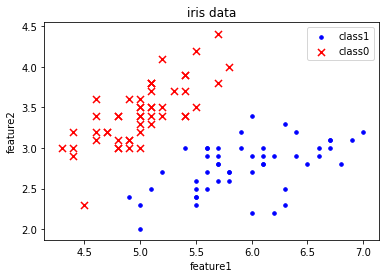

In [435]:
draw_data(x,y)

Your plot should be similar to the example below

**Sigmoid function**
________________

In [436]:
# please do not modify this cell
x = np.concatenate((np.array([np.ones(len(y))]).T, x), axis=1)
theta = np.ones(x.shape[1])

**You can decide by yourselves whether to split the dataset to training and testing. The training and testing datasets spliting is not a part of the assignment 2 as you have done that in assignmnet 1. Without spliting, you can just report the accuracy on training dataset. **

In [437]:
# define sigmoid function
# math: refer to https://en.wikipedia.org/wiki/Sigmoid_function or slides
def sigmoid(theta, X):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. implement the sigmoid function over input theta and X
    #########################################################################
    
    s = 1/(1 + np.exp(-np.dot(x,theta)))
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return s

**Cost function**
____________

In [438]:
# define cost function with sigmoid function
def cost(theta, X, y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. implement the cross entropy loss function with sigmoid             #
    #########################################################################
    
    h = sigmoid(theta, X)
    co = -(np.dot(y.T, np.log(h))+np.dot((1-y).T, np.log(1-h)))
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return co

**Calculate gradients**
________________

In [439]:
# the gradient of the cost is a vector of the same length as θ where the jth element (for j = 0, 1, . . . , n)
def gradient(theta, X, y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. calculate the gradients using theta and sigmoid                    #
    # Hint: X may need to be transposed to do matrix operation              #
    #########################################################################
    grad = np.zeros(X.shape[1])
    for i in range(3):
        temp_grad = -np.sum(np.multiply((y-sigmoid(theta,X)), np.mat(X)[:,i]))
        grad[i] = temp_grad
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return grad

**Predicting**
________________

In [440]:
# predict for new X
def predict(theta, X):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. predict the value using theta and sigmoid                          #
    # 2. convert the predicted value to 0/1                                 #
    # That's how it is called Logistic regression                           #
    #########################################################################
    predict_labels = np.zeros(X.shape[0])
    h = sigmoid(theta, X)
    for i in range(len(y)):
        if h[i] >= 0.5:
            predict_labels[i] = 1
        else:
            predict_labels[i] = 0
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    return predict_labels

**Calculate accuracy**
________________

In [441]:
# calculate accuracy
def accurate(predictions, y):
    #########################################################################
    # Full Mark: 1                                                          # 
    # TODO:                                                                 #
    # 1. calculate the accuracy value                                       #
    # Note that you coud not import extra library                           #
    #########################################################################
    num = len(y)
    accuracy_score = np.sum(np.abs(predictions-y)) / num
    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################
    return accuracy_score

**Calling functions**
________

In [442]:
# please do not modify this cell
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(x, y))
final_theta = result[0]
final_cost = cost(final_theta, x, y)
predictions = predict(final_theta, x)
accuracy = accurate(predictions, y)
print("final cost is " + str(final_cost))
print("accuracy is " + str(accuracy))

final cost is 81.17194164773002
accuracy is 0.93


**Decsion boudary** 

In [443]:
# draw decision boudary
def draw_decision_boudary(final_theta,x,y):
    #########################################################################
    # Full Mark: 2                                                          # 
    # TODO:                                                                 #
    # 1. plot the decision boudary on the raw data                          #
    # 2. set title for the plot                                             #
    # 3. set label for x,y axis                                             #
    # Note, this scatter plot has two different type of points              #
    #########################################################################
    plt.title('Final Decision Boudary')
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    a = x[y==0]
    b = x[y==1]
    plt.scatter(a[:,1], a[:,2], s=50, color='r', marker='x', label='class0')
    plt.scatter(b[:,1], b[:,2], s=50, color='b', marker='.', label='class1')
    ax = plt.gca()
    ax.autoscale(False)
    x_vals = np.array(ax.get_xlim())
    y_vals = -(x_vals * final_theta[1] + final_theta[0])/final_theta[2]
    plt.plot(x_vals, y_vals)
    
    plt.legend(loc=('upper left'))
    

    #########################################################################
    #                       END OF YOUR CODE                                #
    #########################################################################

    # show plot
    plt.show()

Your plot should be similar to the example below

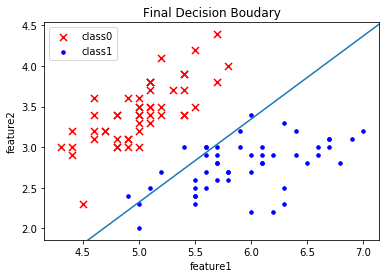

In [444]:
draw_decision_boudary(final_theta,x,y)